**Ryan Shearer         24695394**

Data Processing and Analysis for Question 1

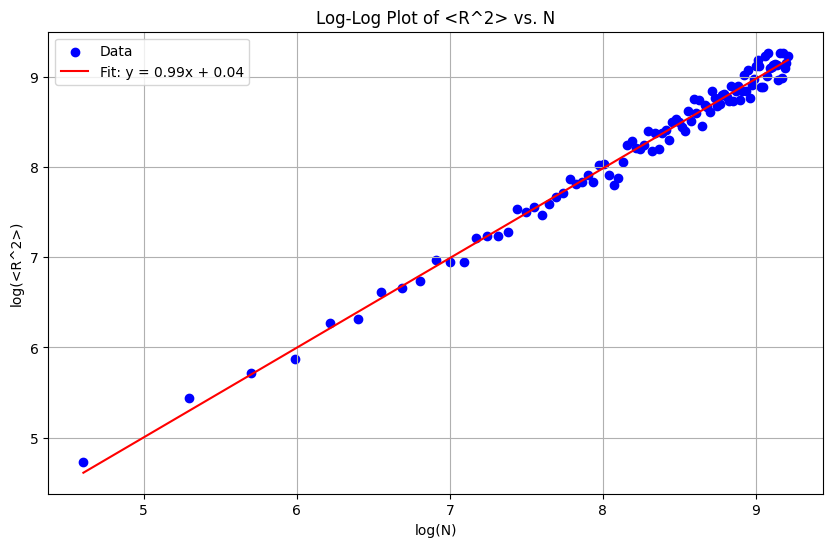

In [19]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# 1. Load Data
data = np.loadtxt("random_walk_data.txt", delimiter=",", skiprows=1)
N_values = data[:, 0]
R2_values = data[:, 1]

# 2. Transform Data
log_N = np.log(N_values)
log_R2 = np.log(R2_values)

# 3. Fit a Linear Function
slope, intercept, r_value, p_value, std_err = linregress(log_N, log_R2)

# 4. Plot
plt.figure(figsize=(10, 6))
plt.scatter(log_N, log_R2, label="Data", color="blue")
plt.plot(log_N, slope*log_N + intercept, label=f"Fit: y = {slope:.2f}x + {intercept:.2f}", color="red")
plt.title("Log-Log Plot of <R^2> vs. N")
plt.xlabel("log(N)")
plt.ylabel("log(<R^2>)")
plt.legend()
plt.grid(True)
plt.show()


**Question 2**

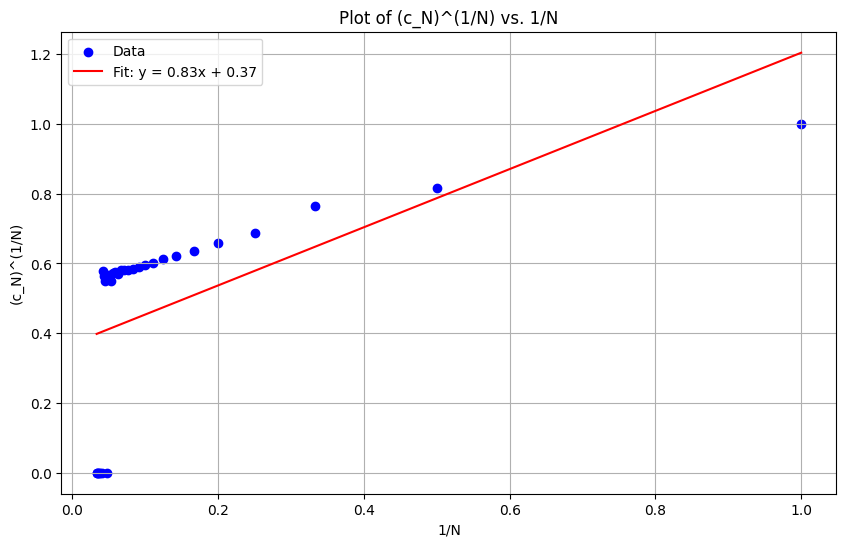

In [20]:


# Python script to analyze the SAW data and estimate the connective constant μ

# 1. Load Data

filtered_data = data[~np.isnan(data).any(axis=1)]

data = np.loadtxt("saw_data.txt", delimiter=",", skiprows=1)
N_values = data[:, 0]
R2_values = data[:, 1]
R_values = data[:, 2]
cN_values = data[:, 3]




# 2. Estimate μ
# Compute (c_N)^(1/N) values
cN_power_1_over_N = np.power(cN_values, 1/N_values)

# Fit a line to (c_N)^(1/N) vs 1/N
slope, intercept, r_value, p_value, std_err = linregress(1/N_values, cN_power_1_over_N)

# 3. Plotting
plt.figure(figsize=(10, 6))
plt.scatter(1/N_values, cN_power_1_over_N, label="Data", color="blue")
plt.plot(1/N_values, slope*(1/N_values) + intercept, label=f"Fit: y = {slope:.2f}x + {intercept:.2f}", color="red")
plt.title("Plot of (c_N)^(1/N) vs. 1/N")
plt.xlabel("1/N")
plt.ylabel("(c_N)^(1/N)")
plt.legend()
plt.grid(True)
plt.show()

